In [1]:
#dataset
from sklearn.datasets import make_classification
import matplotlib.pyplot  as plt
import pandas as pd
import numpy as np

In [2]:
X,Y= make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0) 
#normal dataset

# X= number in decimals, Y = 1,0

print(X)


[[ 6.19192558e-01  8.77334604e-01]
 [ 7.92459374e-01 -1.00168920e+00]
 [ 2.88645453e-01  1.39124803e+00]
 [ 1.58096623e+00 -1.34343848e+00]
 [ 7.28615181e-01  6.72359125e-01]
 [ 2.44324896e+00 -2.17252244e+00]
 [ 9.73350687e-01 -1.20907289e+00]
 [ 7.66433953e-01  6.71150149e-01]
 [-9.31677246e-02  1.18053768e+00]
 [ 1.86027784e+00 -1.28962400e+00]
 [ 1.85632244e+00  1.29734559e+00]
 [ 1.07291752e+00 -1.03438045e+00]
 [ 2.21631713e+00 -1.32152844e+00]
 [ 8.10272562e-01  3.83582180e-01]
 [ 1.32390280e+00 -1.16158966e+00]
 [ 1.65157355e+00 -1.48863858e+00]
 [ 6.04265789e-01  8.41620246e-01]
 [ 2.76358493e-01  8.26400777e-01]
 [-1.17327261e-01  9.45569081e-01]
 [ 1.48885846e+00 -1.40785367e+00]
 [ 2.10452899e+00 -1.57637397e+00]
 [ 2.01227202e+00 -1.42309398e+00]
 [-4.13481302e-01 -6.05148192e-01]
 [ 2.35006978e+00  7.16846004e-01]
 [ 1.26460547e+00  7.87270897e-01]
 [ 2.04382768e+00  6.92510857e-01]
 [ 7.46108758e-01 -1.62074320e+00]
 [ 2.20295375e-01 -3.36804643e-01]
 [ 4.43433331e-01 -1

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

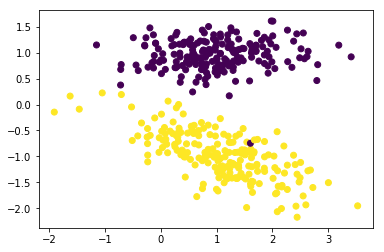

In [3]:
#dividing dataset X and plotting it
plt.scatter(X[:,0],X[:,1],c=Y)
#coverting labels into 1 and -1
Y[Y==0] = -1 #Broadcasting
print(Y)

In [78]:
class SVM:
    """SVM Class, Author : ARUSHI SHARMA"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        print(self.hingeLoss(W,bias,X,Y))
        
        
        #Initial Loss
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses
        
        

In [79]:
mySVM=SVM()

400.0


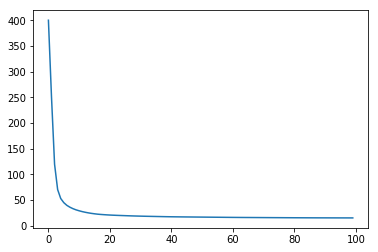

In [80]:
W,b,losses=mySVM.fit(X,Y,maxItr=100)
plt.plot(losses)

In [81]:
W,B = mySVM.W,mySVM.b
print(W,B)


[[-0.32248236 -2.03507209]] 0.38600000000000023


In [82]:
def plotHyperplane(w1,w2,b):
    
    
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2 # WT + B = 0
    
    x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
    x_n = -(w1*x_1+b-1)/w2 # WT + B = +1
    
    
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
    plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

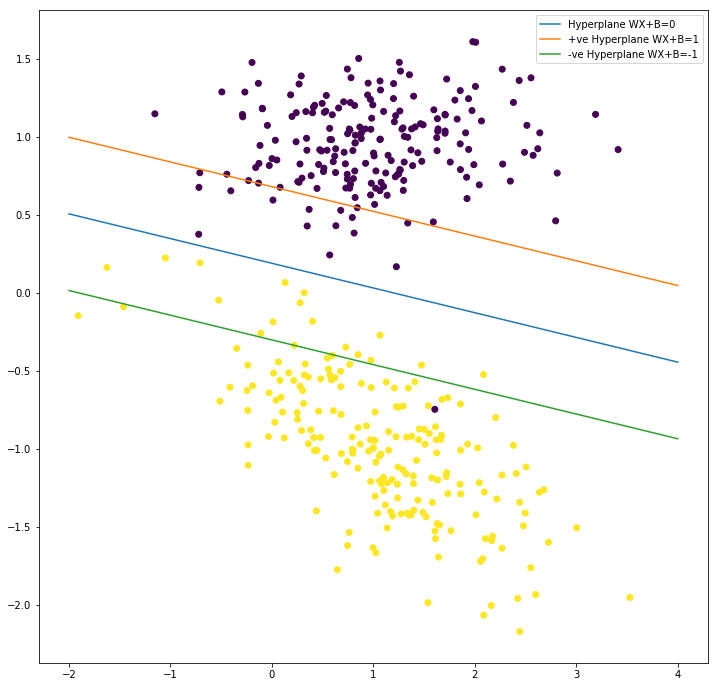

In [83]:
plotHyperplane(W[0,0],W[0,1],B)

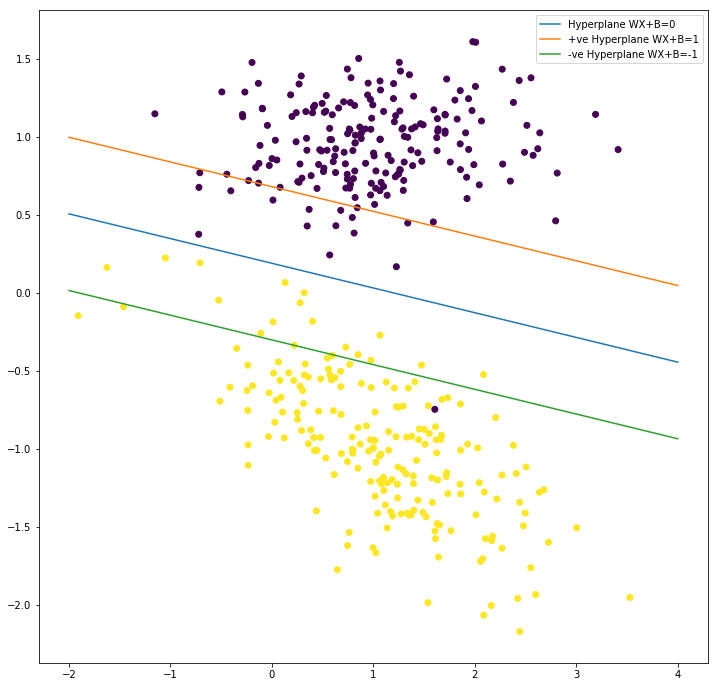

In [84]:
plotHyperplane(W[0,0],W[0,1],B)